# KNN Algorithm (K Nearest Neighbors)

- this alogrithm used in both Regression and classification problems. it based on feature simillarity approach.

- for Example:-
  1. Finance(Financial Institute predict the credit card rating of a customer. In baking institue will predict wether low and safe or risk).
  2. Healthcare
  3. Political Science(Will Vote or Note) 
  4. Handwriting Detection 
  5. Image & Video Recognization 

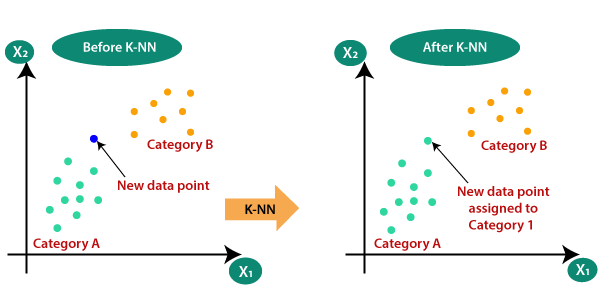

In [25]:
# ![title]("knn.png")
from IPython.display import Image
Image("knn.png")

In [23]:
![knn.png](knn.png)


'[knn.png]' is not recognized as an internal or external command,
operable program or batch file.


### Classifier Building in python and Scikit-learn
we can use the vine dataset, which is a very famous multi-class classification problems. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 18 constituent found in each of the three types wines.

In [3]:
from sklearn import datasets

In [4]:
wine = datasets.load_wine()

In [5]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
# wine.DESCR
# wine.feature_names
# wine.target_names
# wine.target
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

- This Dataset comprises 13 features ('alcohol', 'mallic_acid', 'ash'.......etc. 
- This data has three types of cultivar classses: \class_0, \class_1 .... etc.
- This dataset available int scikt-learn library, or you can also download it from the UCI Machine Learning Library

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
X = wine.data
y = wine.target

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

### Generating Model for K = 3

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.6851851851851852


### Generating Model for K = 5

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7222222222222222


### Generating Model for K = 7

In [38]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7407407407407407


## To Improve KKN agorithm use  Standarlization

In [39]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=0, stratify=y)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9629629629629629


## Parameter Tuning with Cross Validation


In [57]:
from sklearn.model_selection import cross_val_score

In [59]:
neigbhors = list(range(1, 50, 2))
cv_scores = []

for k in neigbhors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv = 10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [60]:
cv_scores

[0.9434640522875817,
 0.9545751633986927,
 0.9604575163398692,
 0.9663398692810456,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9663398692810456,
 0.9722222222222221,
 0.9722222222222221,
 0.9722222222222221,
 0.9833333333333334,
 0.9718954248366012,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9777777777777779,
 0.9777777777777779,
 0.9722222222222221,
 0.9722222222222221,
 0.9663398692810456,
 0.9663398692810456,
 0.9604575163398692,
 0.9604575163398692,
 0.9604575163398692]

In [61]:
MSE = [1- x for x in cv_scores]
MSE

[0.05653594771241832,
 0.04542483660130725,
 0.0395424836601308,
 0.03366013071895435,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.03366013071895435,
 0.0277777777777779,
 0.0277777777777779,
 0.0277777777777779,
 0.016666666666666607,
 0.028104575163398815,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.022222222222222143,
 0.022222222222222143,
 0.0277777777777779,
 0.0277777777777779,
 0.03366013071895435,
 0.03366013071895435,
 0.0395424836601308,
 0.0395424836601308,
 0.0395424836601308]

In [64]:
optimal_k = neigbhors[MSE.index(min(MSE))]
print("The optimal number of k is: ", optimal_k)

The optimal number of k is:  23


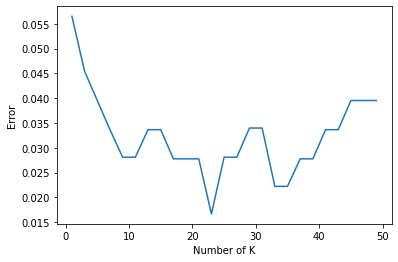

In [65]:
plt.plot(neigbhors, MSE)
plt.xlabel("Number of K")
plt.ylabel("Error")
plt.show()

# The optimal number of k is:  23 and it give high accuracy

In [70]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=0, stratify=y)

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9814814814814815
